<a href="https://colab.research.google.com/github/kareemosama31/AI-Powered-Sign-Language-Recognition-System/blob/main/AI_Powered_Sign_Language_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Summary

🤟 Real-Time ASL Gesture Recognition

Overview:
Developed a CNN-based model to recognize American Sign Language (ASL) letters and numbers in real time via webcam. The dataset contains 36 classes (a–z and 0–10).

What I Did:

Preprocessed images with normalization, augmentation, and resizing.

Built and trained a CNN from scratch achieving high validation accuracy (~90%).

Implemented real-time prediction using webcam input with hand detection and smoothing over multiple frames.

Visualized predictions on the video feed with confidence scores and bounding boxes.

Saved the trained model for deployment in a Python application.

Tech Stack:
Python · TensorFlow/Keras · OpenCV · NumPy · Matplotlib

Outcome:

A working real-time ASL recognition system capable of recognizing letters and numbers.

Demonstrated practical application of deep learning in gesture recognition and human-computer interaction.

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your asl_dataset.zip


Saving archive (1).zip to archive (1).zip


In [ ]:
!unzip kareem.zip -d kareem

Archive:  kareem.zip
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand1_0_bot_seg_5_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand1_0_left_seg_1_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_bot_seg_2_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_bot_seg_5_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_left_seg_5_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_right_seg_1_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_right_seg_5_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_top_seg_1_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand2_0_top_seg_3_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand3_0_dif_seg_3_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/0/hand4_0_bot_seg_4_cropped.jpeg  
  inflating: kareem/ASL_Gestures_36_Classes/test/

Importing Libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

Data preprocessing

In [ ]:
img_size=64
batch_size = 32

train_data= ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.2,
                               horizontal_flip=True,
)

test_data= ImageDataGenerator(rescale=1./255)
train_gen=train_data.flow_from_directory('/content/kareem/ASL_Gestures_36_Classes/train',
                                         target_size=(img_size,img_size),
                                         batch_size=batch_size,
                                         class_mode='categorical')
test_gen=test_data.flow_from_directory('/content/kareem/ASL_Gestures_36_Classes/test',
                                       target_size=(img_size,img_size),
                                       batch_size=batch_size,
                                       class_mode='categorical')


Found 2011 images belonging to 36 classes.
Found 504 images belonging to 36 classes.


Creating CNN

In [ ]:

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.6775 - loss: 0.8796 - val_accuracy: 0.8829 - val_loss: 0.3203
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.7028 - loss: 0.7973 - val_accuracy: 0.8690 - val_loss: 0.3188
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.6919 - loss: 0.8516 - val_accuracy: 0.8690 - val_loss: 0.3272
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.7159 - loss: 0.7754 - val_accuracy: 0.8948 - val_loss: 0.2712
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.7134 - loss: 0.7716 - val_accuracy: 0.8988 - val_loss: 0.2728
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.7349 - loss: 0.6977 - val_accuracy: 0.9067 - val_loss: 0.2491
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.7540 - loss: 0.6860 - val_accuracy: 0.8968 - val_loss: 0.2744
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.7397 - loss: 0.7057 - val_accu

In [ ]:
model.save("asl_letters_numbers_model.h5")


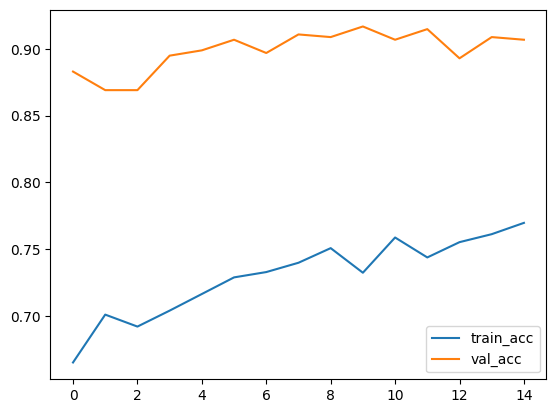

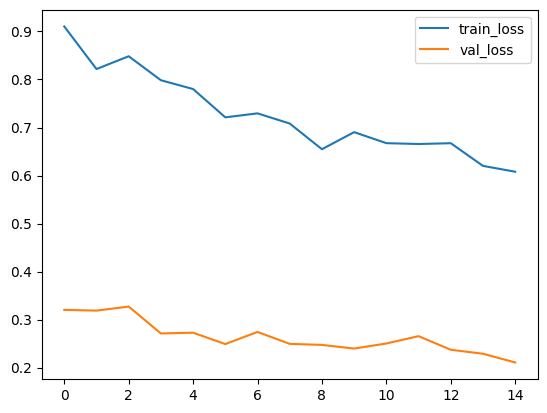

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [ ]:
os.listdir("/content")

['.config',
 '.ipynb_checkpoints',
 'kareem.zip',
 'kareem',
 'asl_letters_numbers_model.h5',
 'sample_data']

In [ ]:
from google.colab import files
files.download("/content/asl_letters_numbers_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}